<a href="https://colab.research.google.com/github/Smaranika2005/Exploring-Fireducks/blob/main/Unlocking_Large_Scale_AI_and_Data_Science_with_FireDucks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##📦 Installing Required Libraries: FireDucks, Pandas & DuckDB


In [ ]:
# Install fireducks (and pandas for comparison)
!pip install fireducks pandas duckdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0


## 🚩Enable Benchmark Mode (FireDucks Special):

In [ ]:
FIREDUCKS_FLAGS = "--benchmark-mode"

##🧪 Generating a Large Synthetic Dataset for Benchmarking

In [ ]:
import pandas as pd
import numpy as np

# Simulate a large CSV file with 10 million rows
df = pd.DataFrame({
    'user_id': np.random.randint(1, 1_000_000, 10_000_000),
    'amount': np.random.rand(10_000_000) * 100,
    'category': np.random.choice(['food', 'tech', 'fashion', 'travel'], 10_000_000),
    'timestamp': pd.date_range(start='2020-01-01', periods=10_000_000, freq='s')
})

# Save it to a CSV
df.to_csv('large_dataset.csv', index=False)


##⚡ CSV Loading Benchmark: Pandas vs FireDucks

In [ ]:
import time
import fireducks.pandas as fd
import pandas as pd

# Using Pandas
start = time.time()
df_pandas = pd.read_csv('large_dataset.csv')
print("Pandas Load Time:", time.time() - start)

# Using FireDucks
start = time.time()
df_fd = fd.read_csv('large_dataset.csv')
print("FireDucks Load Time:", time.time() - start)




Pandas Load Time: 11.474502563476562
FireDucks Load Time: 0.18174505233764648


##🔍 Filter + GroupBy Operation: Pandas vs FireDucks Performance

In [ ]:
# Pandas Filter + GroupBy
start = time.time()
result_pandas = df_pandas[df_pandas['amount'] > 50].groupby('category')['amount'].mean()
print("Pandas Filter+GroupBy Time:", time.time() - start)

# FireDucks Filter + GroupBy
start = time.time()
result_fd = df_fd[df_fd['amount'] > 50].groupby('category')['amount'].mean()
print("FireDucks Filter+GroupBy Time:", time.time() - start)


Pandas Filter+GroupBy Time: 1.2541203498840332
FireDucks Filter+GroupBy Time: 0.005172014236450195


##💸 Identifying Top Spenders per Category: Pandas vs FireDucks

In [ ]:
# Pandas way
start = time.time()
top_pandas = df_pandas.sort_values('amount', ascending=False).groupby('category').head(5)
print("Pandas Top Spenders Time:", time.time() - start)

# FireDucks way
start = time.time()
top_fd = df_fd.sort_values('amount', ascending=False).groupby('category').head(5)
print("FireDucks Top Spenders Time:", time.time() - start)


Pandas Top Spenders Time: 10.741814136505127
FireDucks Top Spenders Time: 0.0008785724639892578


##📊 Visualizing Performance: Pandas vs FireDucks (Bar Chart)

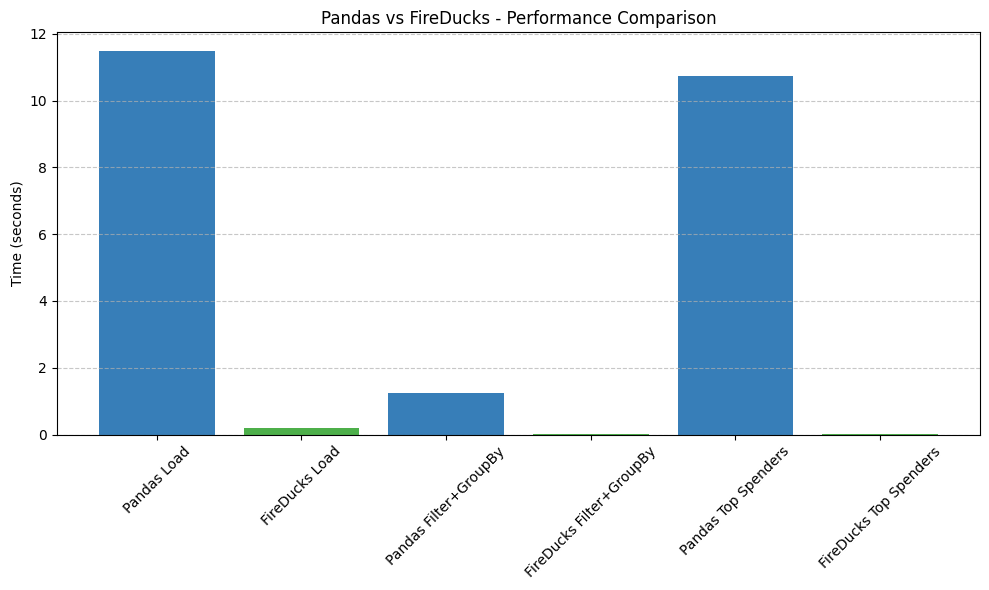

In [ ]:
import matplotlib.pyplot as plt

# Sample timings (replace with actual values from your earlier outputs)
load_times = {
    'Pandas Load': 11.474502563476562,
    'FireDucks Load': 0.18174505233764648,
}

filter_groupby_times = {
    'Pandas Filter+GroupBy': 1.2541203498840332,
    'FireDucks Filter+GroupBy': 0.005172014236450195,
}

top_spenders_times = {
    'Pandas Top Spenders': 10.741814136505127,
    'FireDucks Top Spenders': 0.0008785724639892578,
}

# Combine all
combined = {**load_times, **filter_groupby_times, **top_spenders_times}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(combined.keys(), combined.values(), color=['#377eb8', '#4daf4a'] * 3)
plt.ylabel('Time (seconds)')
plt.title('Pandas vs FireDucks - Performance Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
